<a href="https://colab.research.google.com/github/rajesh0305/MachineLearning_Module2/blob/main/PCA_and_T_SNE_concept_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
d0 = pd.read_csv("/content/drive/MyDrive/MNIST digit recognizer/train.csv")

In [ ]:
print(d0.head(5)) #printing first five row of d0


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [5]:
#save the label into a variable l
l = d0['label']

In [6]:
print(l.head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [7]:
#drop the label feature and store the pixels data in d
d = d0.drop("label",axis = 1)

In [8]:
#print(d.head())
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


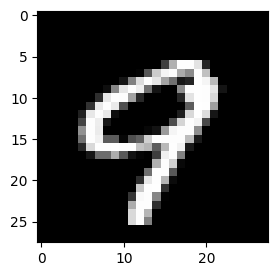

9


In [10]:
#display or plot a number
plt.figure(figsize = (3,3));
idx= 100

#grid_data = d.iloc[idx].as_matrix().reshape(28,28) -->reshaping from 1D to 2D
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation ="none",cmap = "gray")
plt.show()

print(l[idx])

In [11]:
#pick first 15K datapoint to work on the time efficiency .
#task:perform the same analysis on all 42 K datapoints
labels = l.head(15000)
data = d.head(15000)
print("the shape of sample data =",data.shape)

the shape of sample data = (15000, 784)


In [12]:
#data pre-processing: column statnardization of the given data matrix
from sklearn.preprocessing import StandardScaler
standardized_data=  StandardScaler().fit_transform(data)
print(standardized_data.shape)


(15000, 784)


In [13]:
#find the co-variance matrix is (S):=(X^T.X)
sample_data =standardized_data;

#matrix multiplication using the numpy method
covar_matrix_S = np.matmul(sample_data.T,sample_data)
print("the shape of covariance matrix =",covar_matrix_S.shape)


the shape of covariance matrix = (784, 784)


In [14]:
#finding the top two eigen values and corresponding eigen-vectors
#for projecting onto a 2Dim space

from scipy.linalg import eigh

#the parameter 'eigvals' is defined (low value to high value )
#eigh function will return the eigen values in ascending order
#this code generates only the 2 (782 and 783 ) eigen values
values ,vectors = eigh(covar_matrix_S,eigvals=(782,783))
print("shape of eigen vectors = ",vectors.shape)

#cnverting the eigen vectors into (2,d) shape for the easyness of further common operation
vectors  = vectors.T
print("updated shpe of eigen vectors = ",vectors.shape )



shape of eigen vectors =  (784, 2)
updated shpe of eigen vectors =  (2, 784)


<ipython-input-14-d249dba4ad08>:9: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values ,vectors = eigh(covar_matrix_S,eigvals=(782,783))


In [15]:
#projecting the original data sample on the planes
#from by two principle eign vectors by vectors vrctor multiplication

import matplotlib.pyplot as plt
new_coordinates =np.matmul(vectors,sample_data.T)

print("resultant new data points shape ",vectors.shape,"x",sample_data.shape,"=",new_coordinates.shape)

resultant new data points shape  (2, 784) x (15000, 784) = (2, 15000)


In [16]:
import pandas as pd

#appending label to the d2 projected data
new_coordinates= np.vstack((new_coordinates , labels)).T



In [17]:
#creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data = new_coordinates,columns = ("1st_principal","2nd_principal","labels"))
print(dataframe.head())

   1st_principal  2nd_principal  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0


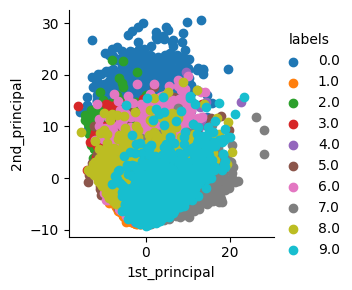

In [18]:
#plotting the 2d data ponts with seaborn
import seaborn as sns
sns.FacetGrid(dataframe,hue = 'labels').map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

PCA using SCIKIT-Learn


In [19]:
#initilizing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [20]:
#configuring the parameters #the number of components = 2
pca.n_components = 2
pca_data=  pca.fit_transform(sample_data)

#pca_reduce will contain the 2d projects of simple data
print("shape of pca_reduced.shape= ", pca_data.shape )

shape of pca_reduced.shape=  (15000, 2)


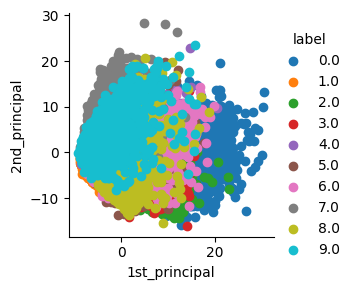

In [21]:
#attaching the labels for each 2d data ponts
pca_data = np.vstack((pca_data.T,labels)).T

#creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data = pca_data,columns = ("1st_principal","2nd_principal","label"))
sns.FacetGrid(pca_df,hue = "label")\
   .map(plt.scatter,'1st_principal','2nd_principal')\
   .add_legend();

plt.show()


PCA for dimensionality reduction (not for visualization)


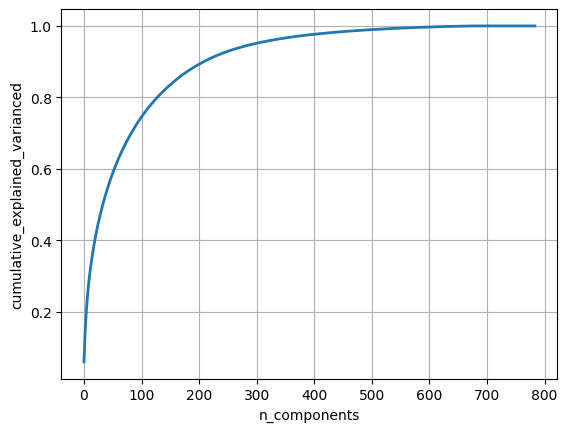

In [22]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_variance_explained = pca.explained_variance_/np.sum(pca.explained_variance_);

cumulative_variance_explained = np.cumsum(percentage_variance_explained)

plt.clf()
plt.plot(cumulative_variance_explained ,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_varianced')
plt.show()

t-SNE using Scikit-Learn


With No Perplexity Value:


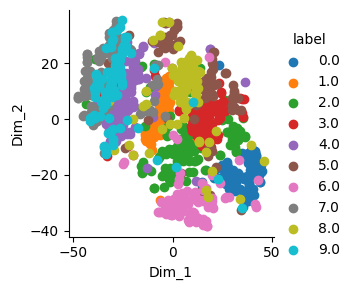

In [27]:
#T-SNE
from sklearn.manifold import TSNE

#picking the top 1000 points as t-sne takes a lot of time for 15k ponts
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model =TSNE(n_components = 2,random_state=0)
#configuring the hyperparameter
#the number of components = 2
#default perplexity = 30
#default learning rate = 200
#default maximum number of iterations for the optimization  = 1000

tsne_data = model.fit_transform(data_1000)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim_1","Dim_2","label"))

print("With No Perplexity Value:")

#plotting the result of tsne
sns.FacetGrid(tsne_df,hue = "label")\
   .map(plt.scatter,'Dim_1','Dim_2')\
   .add_legend();
plt.show();



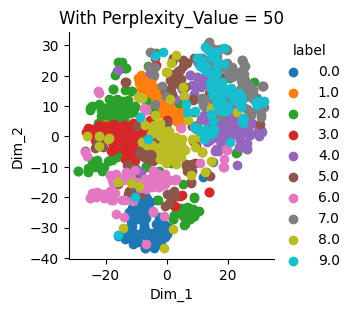

In [29]:
#T-SNE
from sklearn.manifold import TSNE

#picking the top 1000 points as t-sne takes a lot of time for 15k ponts
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model =TSNE(n_components = 2,random_state=0,perplexity = 50)
#configuring the hyperparameter
#the number of components = 2
#default perplexity = 30
#default learning rate = 200
#default maximum number of iterations for the optimization  = 1000

tsne_data = model.fit_transform(data_1000)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim_1","Dim_2","label"))

#print("With Perplexity Value:=50")

#plotting the result of tsne
sns.FacetGrid(tsne_df,hue = "label")\
   .map(plt.scatter,'Dim_1','Dim_2')\
   .add_legend();
plt.title("With Perplexity_Value = 50")
plt.show();

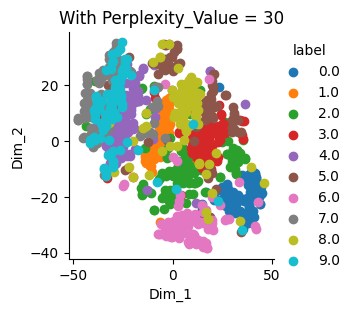

In [30]:
#T-SNE
from sklearn.manifold import TSNE

#picking the top 1000 points as t-sne takes a lot of time for 15k ponts
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model =TSNE(n_components = 2,random_state=0,perplexity = 30)
#configuring the hyperparameter
#the number of components = 2
#default perplexity = 30
#default learning rate = 200
#default maximum number of iterations for the optimization  = 1000

tsne_data = model.fit_transform(data_1000)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim_1","Dim_2","label"))

#print("With Perplexity Value:=50")

#plotting the result of tsne
sns.FacetGrid(tsne_df,hue = "label")\
   .map(plt.scatter,'Dim_1','Dim_2')\
   .add_legend();
plt.title("With Perplexity_Value = 30")
plt.show();

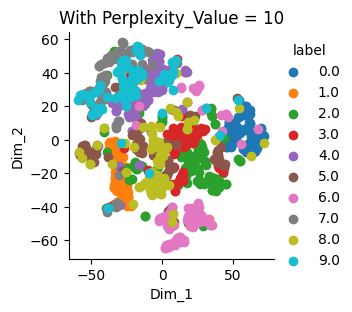

In [31]:
#T-SNE
from sklearn.manifold import TSNE

#picking the top 1000 points as t-sne takes a lot of time for 15k ponts
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model =TSNE(n_components = 2,random_state=0,perplexity = 10)
#configuring the hyperparameter
#the number of components = 2
#default perplexity = 30
#default learning rate = 200
#default maximum number of iterations for the optimization  = 1000

tsne_data = model.fit_transform(data_1000)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim_1","Dim_2","label"))

#print("With Perplexity Value:=50")

#plotting the result of tsne
sns.FacetGrid(tsne_df,hue = "label")\
   .map(plt.scatter,'Dim_1','Dim_2')\
   .add_legend();
plt.title("With Perplexity_Value = 10")
plt.show();

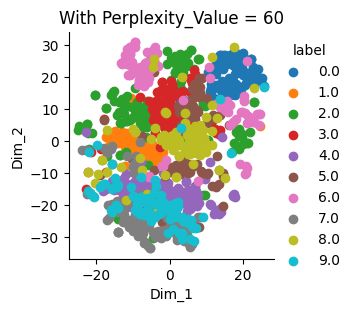

In [32]:
#T-SNE
from sklearn.manifold import TSNE

#picking the top 1000 points as t-sne takes a lot of time for 15k ponts
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model =TSNE(n_components = 2,random_state=0,perplexity = 60)
#configuring the hyperparameter
#the number of components = 2
#default perplexity = 30
#default learning rate = 200
#default maximum number of iterations for the optimization  = 1000

tsne_data = model.fit_transform(data_1000)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim_1","Dim_2","label"))

#print("With Perplexity Value:=50")

#plotting the result of tsne
sns.FacetGrid(tsne_df,hue = "label")\
   .map(plt.scatter,'Dim_1','Dim_2')\
   .add_legend();
plt.title("With Perplexity_Value = 60")
plt.show();

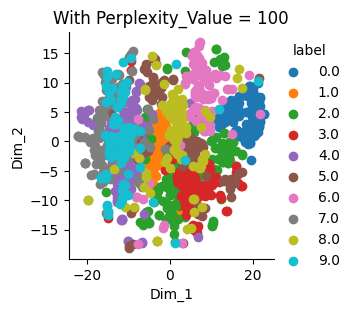

In [33]:
#T-SNE
from sklearn.manifold import TSNE

#picking the top 1000 points as t-sne takes a lot of time for 15k ponts
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model =TSNE(n_components = 2,random_state=0,perplexity = 100)
#configuring the hyperparameter
#the number of components = 2
#default perplexity = 30
#default learning rate = 200
#default maximum number of iterations for the optimization  = 1000

tsne_data = model.fit_transform(data_1000)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim_1","Dim_2","label"))

#print("With Perplexity Value:=50")

#plotting the result of tsne
sns.FacetGrid(tsne_df,hue = "label")\
   .map(plt.scatter,'Dim_1','Dim_2')\
   .add_legend();
plt.title("With Perplexity_Value = 100")
plt.show();

what if we increase the number of iteration

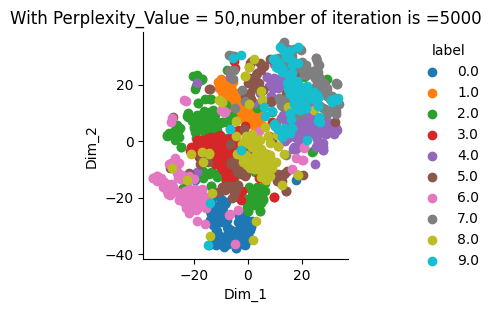

In [36]:
#T-SNE
from sklearn.manifold import TSNE

#picking the top 1000 points as t-sne takes a lot of time for 15k ponts
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model =TSNE(n_components = 2,random_state=0,perplexity = 50,n_iter = 5000)
#configuring the hyperparameter
#the number of components = 2
#default perplexity = 30
#default learning rate = 200
#default maximum number of iterations for the optimization  = 1000

tsne_data = model.fit_transform(data_1000)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim_1","Dim_2","label"))

#print("With Perplexity Value:=50")

#plotting the result of tsne
sns.FacetGrid(tsne_df,hue = "label")\
   .map(plt.scatter,'Dim_1','Dim_2')\
   .add_legend();
plt.title("With Perplexity_Value = 50,number of iteration is =5000")
plt.show();